## Загрузим нужные библиотеки

In [34]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from settings import RAW_PATH
import numpy as np

Выполним загрузу датсета

In [23]:
df_train = pd.read_csv(RAW_PATH / "train.csv", index_col= 0)
df_test = pd.read_csv(RAW_PATH / "test.csv", index_col= 0)

## Проанализируем датасет

## Проанализируем датасет

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   object 
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   object 
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 601.6+ KB


Заменим категорию и автора на число

In [25]:
df_train["category"] = df_train["category"].astype('category')
df_train["category"] = df_train["category"].cat.codes
df_train["category"] = df_train["category"].astype('int')

In [26]:
df_train["authors"] = df_train["authors"].astype('category')
df_train["authors"] = df_train["authors"].cat.codes
df_train["authors"] = df_train["authors"].astype('int')

In [27]:
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [28]:
df_train.head(3)

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,day,mounth
document_id,,,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850,4,4
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,38,1.853,0,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355,18,2
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,560,0.000,0,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424,12,2


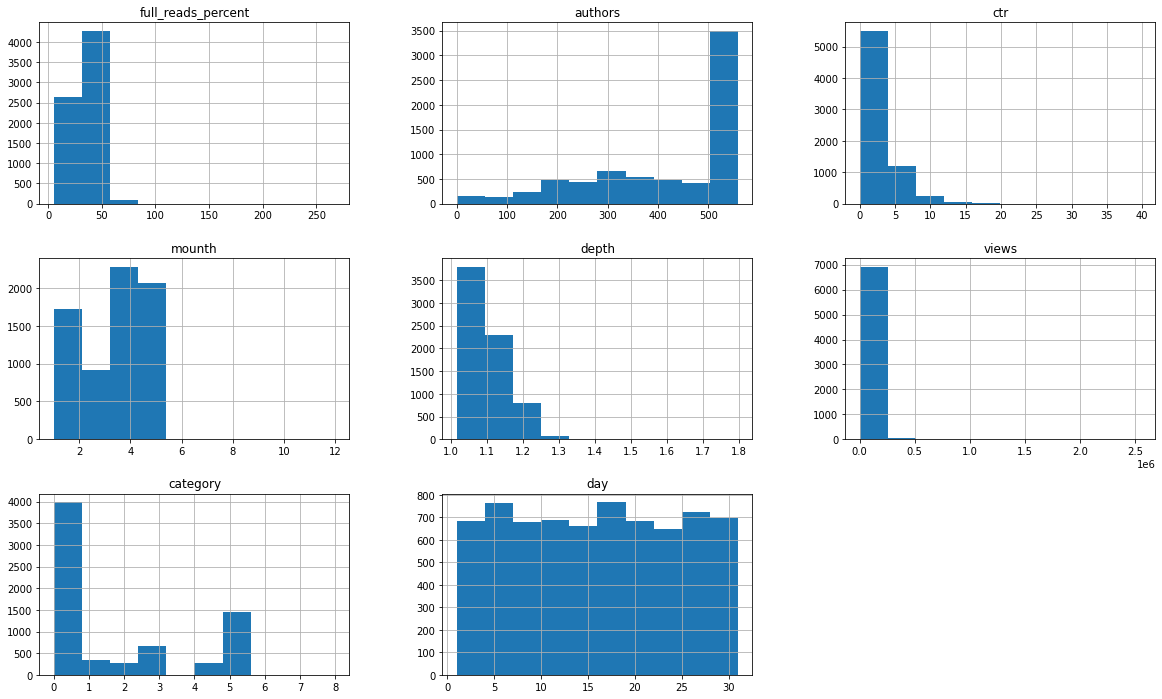

In [29]:
features = list(set(df_train.columns) - set(['publish_date']))

_ = df_train[features].hist(figsize=(20,12))

Всего 9 категорий статей

In [ ]:
df_train.authors.value_counts()

## Выделим выборки

In [ ]:
X = df_train.drop(["views","depth","full_reads_percent","title","publish_date", "session", "tags"], axis = 1)
y = df_train[["views","depth","full_reads_percent"]]

In [ ]:
X.columns

In [ ]:
rs = np.random.RandomState(0)
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Подбор модели

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor()

In [ ]:
param_grid = { 
            "n_estimators"      : [500, 1000, 2000, 5000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,5],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
grid.best_score_ , grid.best_params_

Обучим модель

In [ ]:
regr = RandomForestRegressor(random_state=0, n_estimators=grid.best_params_['n_estimators'], max_features=grid.best_params_['max_features'], min_samples_split=grid.best_params_['min_samples_split'], bootstrap=grid.best_params_['bootstrap'] )

In [ ]:
regr.fit(X_train, y_train)

Предскажем значения

In [ ]:
pred = regr.predict(X_test)

## Оценка точности

In [ ]:
score_views = r2_score(y_test["views"], pred[:,0])
score_depth = r2_score(y_test["depth"], pred[:,1])
score_frp = r2_score(y_test["full_reads_percent"], pred[:,2])

In [ ]:
score = 0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp

score

In [ ]:
coefs = pd.DataFrame(
   regr.feature_importances_,
   columns=['Coefficients'], index=regr.feature_names_in_
)


In [ ]:
coefs

In [51]:
score = 0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp

score

0.6001690346538675

In [61]:
coefs = pd.DataFrame(
   regr.feature_importances_,
   columns=['Coefficients'], index=regr.feature_names_in_
)


In [62]:
coefs

,Coefficients
authors,0.116727
ctr,0.667953
category,0.014496
day,0.087580
mounth,0.113244


In [ ]:
df_test["category"] = df_test["category"].astype('category')
df_test["category"] = df_test["category"].cat.codes
df_test["category"] = df_test["category"].astype('int')

In [ ]:
df_test["authors"] = df_test["authors"].astype('category')
df_test["authors"] = df_test["authors"].cat.codes
df_traidf_testn["authors"] = df_test["authors"].astype('int')

In [ ]:
df_test['day'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%d").astype(int)
df_test['mounth'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%m").astype(int)

In [53]:
X_test_test = df_test.drop(["title","publish_date", "session", "tags"], axis = 1)

In [54]:
X_test_test.columns

Index(['authors', 'ctr', 'category'], dtype='object')

In [55]:
pred_test = regr.predict(X_test_test)

C:\Users\evvEn\PycharmProjects\news\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- day
- mounth

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: '[]'